In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8913,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,Brens7,1180,2.0,1.0,59.47
6205,Super built-up Area,18-Aug,Kodihalli,4 BHK,Soianal,3260,5.0,3.0,388.00
7362,Super built-up Area,18-May,Ramagondanahalli,3 BHK,ViistLa,1475,2.0,2.0,63.00
8393,Super built-up Area,Ready To Move,Hebbal Kempapura,2 BHK,Goateds,1400,2.0,2.0,108.00
640,Super built-up Area,18-Aug,Mahadevpura,2 BHK,NaN,1225,2.0,2.0,48.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df.drop(['area_type','availability','society'],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2.dropna(subset=['size','bath','balcony'],how='all',inplace=True)

In [10]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [11]:
df2.dropna(subset=['bath','balcony'],how='all',inplace=True)

In [12]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [13]:
df2[df2['location'].isnull()]

,location,size,total_sqft,bath,balcony,price
568,NaN,3 BHK,1600,3.0,2.0,86.0


In [14]:
df2.drop(568,inplace=True)

In [15]:
df2.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [16]:
df2.balcony.describe()

count    12710.000000
mean         1.584343
std          0.817287
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [17]:
df2.price.describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

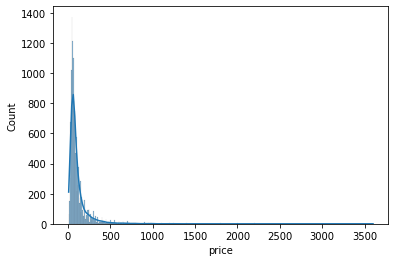

In [36]:
#plt.figure(figsize=(50,20))
sns.histplot(df2.price,bins=500,kde=True)

In [19]:
df2[(df2.balcony.isnull()) & (df2['price']>50) & (df2['price']<70)].shape

(29, 6)

In [31]:
df2[(df2['balcony']==3) & (df2['price']>150) & (df2['price']<200)]
# 246 with 3 balcony and price between 90-70 with 1 is 631 2 is 716
# 324 with 3 balcony and price between 50-70  with 1 is 1173  2 is 1129
# 209 with 3 balcony and price between 120-90 with 1 is 395  2 is 590
# 117 with 3 between 120-150 with 2 is 389 with 1 is 194
# 156 with 1 between 150-200 with 2 is 275 with 3 is 146

,location,size,total_sqft,bath,balcony,price
89,Rajaji Nagar,6 Bedroom,710,6.0,3.0,160.0
323,Akshaya Vana,4 Bedroom,1200,4.0,3.0,165.0
481,Basavangudi,4 Bedroom,1125,4.0,3.0,180.0
516,Haralur Road,4 BHK,2805,5.0,3.0,154.0
559,Marathahalli,4 Bedroom,1780,4.0,3.0,175.0
...,...,...,...,...,...,...
12963,Uttarahalli,4 Bedroom,1200,4.0,3.0,155.0
12993,Judicial Layout,5 BHK,1100,4.0,3.0,199.0
13124,Yeshwanthpur,3 BHK,1876,3.0,3.0,160.0
13134,"Thanisandra Main Road,",4 BHK,2872,4.0,3.0,183.0


In [48]:
df2[ (df2['price']>500) ].price.unique()# potential outliers

array([ 600.,  650.,  760., 2200.,  700.,  528.,  660., 1250.,  550.,
        640.,  900.,  560.,  775.,  675.,  800.,  525., 1200., 1015.,
        696.,  540.,  625.,  830.,  580.,  520.,  510.,  629., 1000.,
        558., 2100.,  864.,  627.,  570.,  515.,  725., 1500., 2700.,
        720.,  750., 2050.,  986.,  530.,  763.,  850., 1900., 1700.,
        950.,  899.,  901., 1150.,  598.,  501., 1102., 1100.,  972.,
        815., 2250., 1584., 2000.,  980.,  662., 1063.,  795.,  511.,
       1600.,  943.,  792., 1400.,  590., 1850.,  995., 1675.,  936.,
        523.,  718.,  821., 1800.,  785.,  615., 1950.,  578.,  559.,
       2340.,  595.,  975.,  536.,  852.,  630., 2912.,  716.,  788.,
        699.,  602., 2736.,  601.,  610., 2600.,  744.,  948.,  649.,
        680., 1824., 3600.,  988., 2800.])

In [49]:
df2['BHK'] = df2['size'].apply(lambda x:int(x.split()[0]))

In [50]:
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [60]:
df2.shape

(13246, 7)

In [51]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

#  A typical 1BHK can be built in approximately 400 square feet of area.

In [58]:
df2[(df2.BHK<20) & (df2.BHK>10)]

,location,size,total_sqft,bath,balcony,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,NaN,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,NaN,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,NaN,150.0,11
9935,1Hoysalanagar,13 BHK,5425,13.0,0.0,275.0,13
11559,1Kasavanhalli,18 Bedroom,1200,18.0,NaN,200.0,18


In [59]:
1718,4684,1768,3379,3853,4916,6533,11559

(1718, 4684)

In [61]:
df2.drop([1718,4684,1768,3379,3853,4916,6533,11559],inplace=True)

In [63]:
df2.shape

(13238, 7)

In [66]:
df2[df2.duplicated()]

,location,size,total_sqft,bath,balcony,price,BHK
242,Chandapura,1 BHK,645,1.0,1.0,16.45,1
887,Chandapura,2 BHK,1015,2.0,2.0,25.88,2
905,Kanakpura Road,1 BHK,525,1.0,1.0,26.00,1
971,Haralur Road,3 BHK,1464,3.0,2.0,56.00,3
1115,Haralur Road,2 BHK,1027,2.0,2.0,44.00,2
...,...,...,...,...,...,...,...
13285,VHBCS Layout,2 BHK,1353,2.0,2.0,110.00,2
13299,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.50,4
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,2.0,250.00,7
13313,Uttarahalli,3 BHK,1345,2.0,1.0,57.00,3


In [67]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [70]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [74]:
def converting_ranges_to_one_number(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [75]:
converting_ranges_to_one_number('555ki')

In [77]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(converting_ranges_to_one_number)

In [81]:
df3.total_sqft

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13238, dtype: float64

In [ ]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']